In [1]:
import sys
sys.path.append("../getData")
sys.path.append("../../visualization")
sys.path.append("../functions")
sys.path.append("../Models")
import bdStocks
import bdMacro
import analyseDataModels 
import graficosJupyterNotebook as graficos
import numpy as np
import pandas as pd
import transformationsDataframes as tfataframe
pd.set_option('display.max_rows', None)

In [2]:
exchange="MC"
indiceName="ibex35"
getsectors=True
getdescriptions=False
columnas=["netIncome","totalRevenue","stock"]
columnasPrecios=["Adjusted_close","stock"]
not_index=True
tamMinimo=50
mod=4
nivel_confianza=0.05
numberPreds=10

In [3]:
bd=bdStocks.getData()
precios=bd.getPrizesByExchange(exchange,columnas=columnasPrecios)
fundamentals=bd.getFundamentalsByExchange(exchange,bd=True,columnas=columnas)
indice=bd.getIndexPrizes(indiceName)
if getsectors:
    sectors=bd.getSectors(exchange)
    fundamentals["sector"]=fundamentals["stock"].transform(lambda t:sectors[t])
if   getdescriptions:
    descriptions=bd.getDescriptions(exchange)
    fundamentals["description"]=fundamentals["stock"].transform(lambda t:descriptions[t])
if not_index:
    precios.reset_index(inplace=True)
    fundamentals.reset_index(inplace=True)
    
events= bdMacro.devolverCalendario(exchange)

Time: 03/05/2022, 16:44 Message: CSV access time to get prizes 1.760526418685913

Time: 03/05/2022, 16:44 Message: Object size (prizes data)63.467325 MB

Time: 03/05/2022, 16:44 Message: BD access time to get stock fundamentals 0.4787437915802002

Time: 03/05/2022, 16:44 Message: Object size (fundamental data)8.026913 MB

Time: 03/05/2022, 16:44 Message: BD access time to sectors 0.06207132339477539



In [4]:
#random forest
import datetime as dt
indice1=tfataframe.pasarAMensual(indice)
macro=events.fillna(method="ffill").join(indice1.loc[:,["Close"]],how="left")
macro=macro.loc[events.index>=dt.datetime(2012,3,1)].drop(["unemploymentchange","gdpyoy"],axis=1)
macro

,cpimom,cpiyoy,retailsalesyoy,manufacturingPMI,industrialProductionYoY,servicesPMI,gdpqoq,Close
2012-03-01,0.1,2.0,-4.8,45.0,-4.2,41.9,-0.3,8547.7
2012-04-01,0.7,1.9,-3.7,44.5,-5.1,46.3,-0.3,8042.8
2012-05-01,1.4,2.1,-9.8,43.5,-7.5,42.1,-0.3,6831.9
2012-06-01,-0.1,1.9,-4.9,42.0,-8.3,41.8,-0.3,6065.0
2012-07-01,-0.2,1.9,-5.2,41.1,-6.1,43.4,-0.4,7124.0
2012-08-01,-0.2,2.2,-7.3,42.3,-6.3,43.7,-0.4,6720.0
2012-09-01,0.6,2.7,-2.1,44.0,-5.4,44.0,-0.4,7434.2
2012-10-01,1.0,3.4,-10.9,44.6,-3.2,40.2,-0.3,7784.1
2012-11-01,0.8,3.5,-9.7,43.5,-7.0,41.2,-0.3,7886.4
2012-12-01,-0.1,2.9,-7.8,45.3,-3.3,42.4,-0.3,7889.2


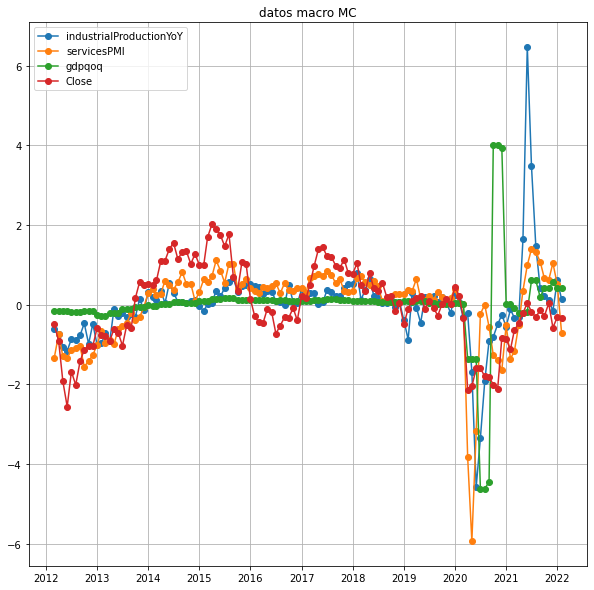

,cpimom,cpiyoy,retailsalesyoy,manufacturingPMI,industrialProductionYoY,servicesPMI,gdpqoq,Close
cpimom,1.000000,0.243783,0.089585,0.014468,0.058799,-0.012320,0.085219,-0.027649
cpiyoy,0.243783,1.000000,-0.077443,0.104875,0.136594,0.039441,0.061118,-0.162605
retailsalesyoy,0.089585,-0.077443,1.000000,0.662729,0.602239,0.699951,0.150658,0.451066
manufacturingPMI,0.014468,0.104875,0.662729,1.000000,0.613101,0.794815,0.202351,0.571710
industrialProductionYoY,0.058799,0.136594,0.602239,0.613101,1.000000,0.552401,0.308783,0.429647
servicesPMI,-0.012320,0.039441,0.699951,0.794815,0.552401,1.000000,0.112238,0.690943
gdpqoq,0.085219,0.061118,0.150658,0.202351,0.308783,0.112238,1.000000,0.153223
Close,-0.027649,-0.162605,0.451066,0.571710,0.429647,0.690943,0.153223,1.000000


In [5]:
graficos.linearplot(macro,"datos macro "+exchange,True,*macro.columns[[4,5,6,7]])
macro.corr()

In [6]:
#pca
from sklearn.decomposition import PCA

X,pca=analyseDataModels.pca(macro,includeClose=False,n_components=5)
print(pca.explained_variance_ratio_.round(3))
pd.DataFrame(pca.components_.T,index=macro.columns[0:7])

[0.671 0.14  0.079 0.069 0.028]


,0,1,2,3,4
cpimom,-0.002580,0.009178,0.015483,0.012871,0.005987
cpiyoy,-0.007287,0.044667,-0.094157,-0.035997,0.089337
retailsalesyoy,-0.515254,-0.171698,0.803776,0.225343,-0.005452
manufacturingPMI,-0.337336,-0.114716,-0.236162,0.044415,0.897476
industrialProductionYoY,-0.525886,0.749123,-0.065965,-0.379981,-0.105797
servicesPMI,-0.579918,-0.515251,-0.480520,-0.017361,-0.408340
gdpqoq,-0.088300,0.358623,-0.231981,0.895042,-0.092491


In [7]:
#svm classification
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVC

svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, C=1))))
y=macro.loc[:,macro.columns[7]]>=macro.loc[:,macro.columns[7]].shift(1)
X=macro.loc[:,macro.columns[0:7]]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
svm_clf.fit(X_train,y_train)
sum(svm_clf.predict(X_test)==y_test)/len(y_test)
macro.columns

Index(['cpimom', 'cpiyoy', 'retailsalesyoy', 'manufacturingPMI',
       'industrialProductionYoY', 'servicesPMI', 'gdpqoq', 'Close'],
      dtype='object')

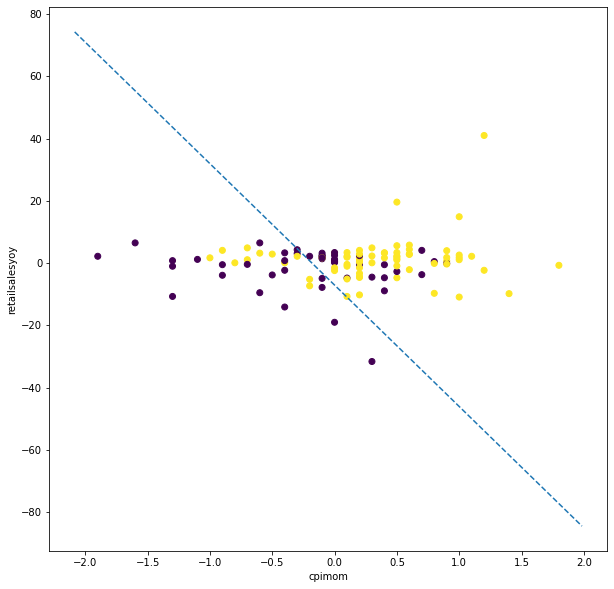

In [15]:
#svm classification
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import  train_test_split
import matplotlib.lines as mlines

svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
y=macro.loc[:,macro.columns[1]]>=macro.loc[:,macro.columns[1]].shift(1)
X=macro.loc[:,macro.columns[[0,2]]]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
svm_clf.fit(X_train,y_train)


sum(svm_clf.predict(X_test)==y_test)/len(y_test)
svm_clf2 = LinearSVC(C=1, loss="hinge").fit(X_train,y_train)
cero=svm_clf2.intercept_[0]
pendiente=(svm_clf2.coef_[0])
graficos.scatterWithCOlor( X,y,cero,pendiente)

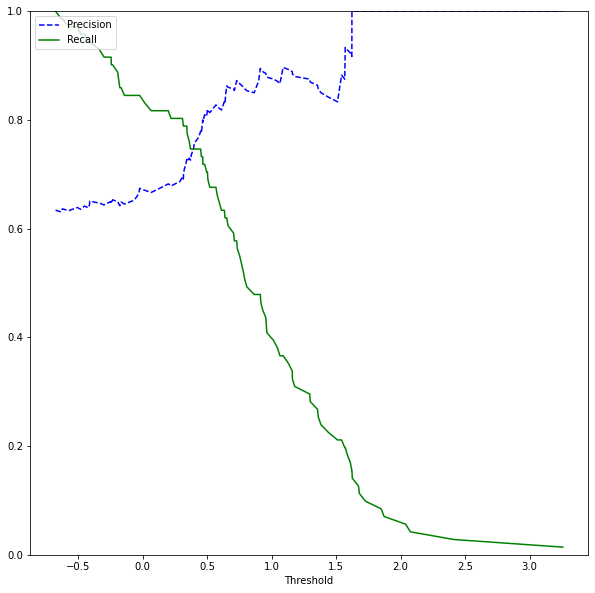

(array([[20, 29],
        [12, 59]]),
 0.625,
 0.40816326530612246,
 0.4938271604938272,
 array([0.625     , 0.67045455]),
 array([0.40816327, 0.83098592]),
 array([0.49382716, 0.74213836]))

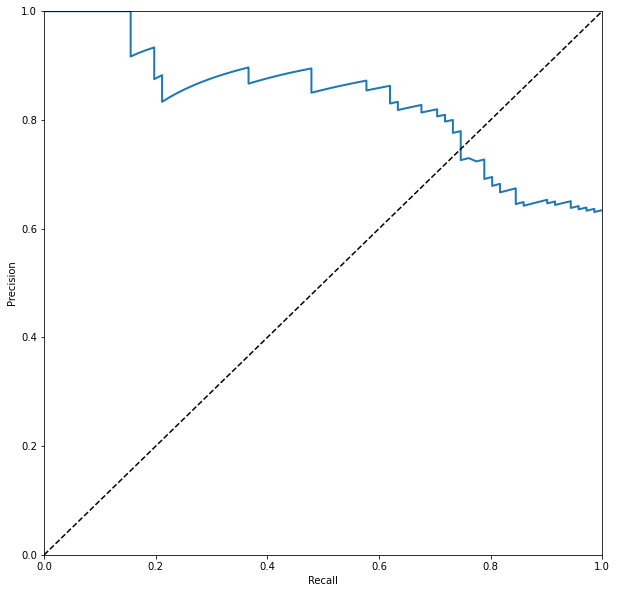

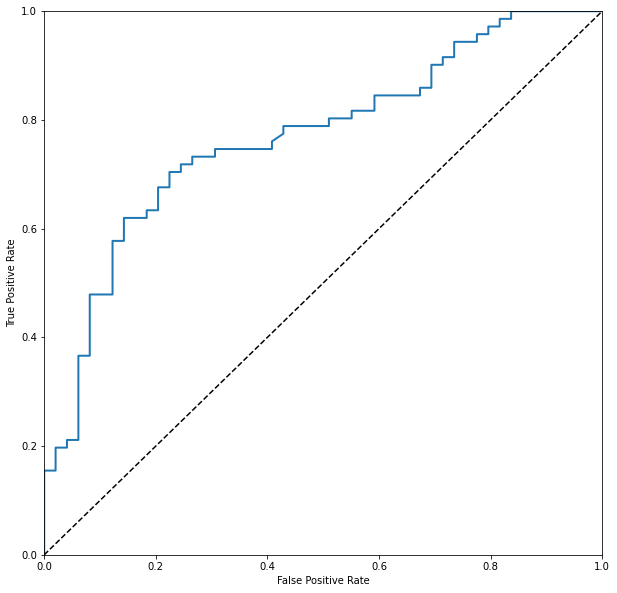

In [16]:
#performance metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
cross_val_score(svm_clf, X, y, cv=6, scoring="accuracy")
y_pred = cross_val_predict(svm_clf, X, y, cv=3)
y_scores = cross_val_predict(svm_clf, X, y, cv=3,method="decision_function")
#confusion matrix: TP FN
                #  FP TN
mat=confusion_matrix(y,y_pred,labels=[False,True])
recall=mat[0,0]/sum(mat[0])
precision=mat[0,0]/sum(mat[:,0])

fpr, tpr, thresholds = roc_curve(y, y_scores)
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
graficos.plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
graficos. plot_precission_recall(precisions, recalls)
graficos.plot_roc_curve(fpr, tpr, label=None)
mat,precision,recall,2*precision*recall/(precision+recall),precision_score(y,y_pred,labels=[False,True],average=None),recall_score(y,y_pred,labels=[False,True],average=None),f1_score(y,y_pred,labels=[False,True],average=None)

In [34]:
#grid searh
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
svc_3=LinearSVC(loss="hinge")
param_grid=[{"C":np.arange(1,200,5)}]
#grid_search = GridSearchCV(svc_3,param_grid, cv=5,
#scoring="f1")
grid_search = GridSearchCV(svc_3,param_grid, cv=3,
scoring="accuracy")
grid_search.fit(X,y)
C=grid_search.best_params_["C"]
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=C, loss="hinge")),
))
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

C,precision_score(y,y_pred,labels=[False,True],average=None),\
recall_score(y,y_pred,labels=[False,True],average=None),\
f1_score(y,y_pred,labels=[False,True],average=None),accuracy_score(y,y_pred)


(146,
 array([0.625     , 0.67045455]),
 array([0.40816327, 0.83098592]),
 array([0.49382716, 0.74213836]),
 0.6583333333333333)

In [35]:
#ramdomnize searhc
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
svc_3=LinearSVC(loss="hinge")
param_grid=[{"C":np.arange(1,200,5)}]
#grid_search = GridSearchCV(svc_3,param_grid, cv=5,
#scoring="f1")
grid_search = RandomizedSearchCV(svc_3,param_grid, cv=3,
scoring="accuracy")
grid_search.fit(X,y)
C=grid_search.best_params_["C"]
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=C, loss="hinge")),
))
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

C,precision_score(y,y_pred,labels=[False,True],average=None),\
recall_score(y,y_pred,labels=[False,True],average=None),\
f1_score(y,y_pred,labels=[False,True],average=None),accuracy_score(y,y_pred)

(86,
 array([0.63333333, 0.66666667]),
 array([0.3877551 , 0.84507042]),
 array([0.48101266, 0.74534161]),
 0.6583333333333333)

In [49]:
#boosted trees
#Gradient boosting
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
y=macro.loc[:,macro.columns[1]]>=macro.loc[:,macro.columns[1]].shift(1)
X=macro.loc[:,macro.columns[[0,2]]]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=10, learning_rate=0.1)
y_pred = cross_val_predict(gbrt , X, y, cv=5)
np.mean(y_pred==y)
param_grid=[{"max_depth":np.arange(1,7,1),"n_estimators":np.arange(1,10,1),"learning_rate":np.arange(0.001,1,0.005)}]
#grid_search = GridSearchCV(svc_3,param_grid, cv=5,
#scoring="f1")
grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
scoring="accuracy")
grid_search.fit(X,y)
grid_search.best_params_
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=5, learning_rate=0.161)
y_pred = cross_val_predict(gbrt , X, y, cv=3)
np.mean(y_pred==y)



0.7583333333333333

In [11]:
#neural network

In [ ]:
#no parametric regression

In [ ]:
#kmeans